### Install MXNet and autogluon

autogluon은 fit() - Training 함수 호출만으로 상당히 높은 정확도의 모델을 생성하며, 최신 기능들이 계속 업데이트 되어지고 있습니다.

source https://autogluon.mxnet.io/
##### 참고
* 한글 동영상 - https://youtu.be/xnimaVNTWfc
* aws 블로그 - https://aws.amazon.com/ko/blogs/opensource/machine-learning-with-autogluon-an-open-source-automl-library/
* 블로그의 샘플코드 - https://github.com/shashankprasanna/autogluon-demos/blob/master/otto-kaggle-example.ipynb
* 데모 - https://github.com/shashankprasanna/autogluon-demos
* 소스 - https://github.com/awslabs/autogluon
* paper - https://arxiv.org/abs/2003.06505 https://arxiv.org/pdf/2003.06505.pdf

In [1]:
import mxnet

In [2]:
mxnet.__version__

'1.6.0'

In [4]:
!pip install autogluon==0.1.0

     |████████████████████████████████| 311 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 9.4 MB/s  eta 0:00:01
     |████████████████████████████████| 230 kB 42.4 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 25.9 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 18.2 MB/s  eta 0:00:01
     |████████████████████████████████| 950 kB 63.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 116.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 125.1 MB/s eta 0:00:01
     |██████████████▌                 | 400.3 MB 124.5 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |██████████████████████████      | 713.9 MB 29.5 MB/s eta 0:00:062

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 881.9 MB 621 bytes/s ta 0:00:01
     |████████████████████████████████| 65.7 MB 348 kB/s  eta 0:00:01
     |████████████████████████████████| 2.0 MB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 157.5 MB 122.7 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 124.1 MB/s eta 0:00:01
     |████████████████████████████████| 157 kB 126.3 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 79.0 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 18.0 MB/s  eta 0:00:01
     |████████████████████████████████| 2.9 MB 77.8 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 112.9 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 5.3 MB/s s eta 0:00:01
     |████████████████████████████████| 23.3 MB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 43.7 MB/s eta 0:00:01
     |█████████████████

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

### Data Preparation

In [4]:
import pandas as pd

In [5]:
%%time
import sagemaker
from sagemaker import get_execution_role


role = get_execution_role()

CPU times: user 221 ms, sys: 48.5 ms, total: 270 ms
Wall time: 716 ms


In [6]:
import boto3
import os
role

'arn:aws:iam::806174985048:role/service-role/AmazonSageMaker-ExecutionRole-20201218T151409'

In [7]:
%%time
file = 'train.csv'
data_folder = '../../../../data/AdTalking'

file_path = os.path.join(data_folder, file)

raw_df = pd.read_csv(file_path, parse_dates=['click_time'])
raw_df

CPU times: user 1min 32s, sys: 22 s, total: 1min 54s
Wall time: 2min 9s


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
...,...,...,...,...,...,...,...,...
184903885,121312,12,1,10,340,2017-11-09 16:00:00,NaN,0
184903886,46894,3,1,19,211,2017-11-09 16:00:00,NaN,0
184903887,320126,1,1,13,274,2017-11-09 16:00:00,NaN,0
184903888,189286,12,1,37,259,2017-11-09 16:00:00,NaN,0


In [8]:
sampling_rate = 0.01
df = raw_df.sample(frac=sampling_rate, random_state=100)

In [9]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
71816445,103106,3,1,13,371,2017-11-08 00:49:06,NaN,0
118420665,83928,3,1,19,417,2017-11-08 14:54:59,NaN,0
2983188,36150,15,2,49,3,2017-11-06 17:27:10,NaN,0
111499266,40056,26,1,18,477,2017-11-08 13:00:46,NaN,0
1598682,39081,18,1,8,107,2017-11-06 16:37:52,NaN,0


In [10]:
def drop_column(raw_df, col):
    df = raw_df.drop(columns=[col])
    return df

df = drop_column(df, col='attributed_time')

In [11]:
print("min time: ", df.click_time.min())
print("max time: ", df.click_time.max())

min time:  2017-11-06 15:46:38
max time:  2017-11-09 16:00:00


In [12]:
def split_data_by_time(df, target_col, label_col, total_samples, split_rate, train_end, test_start, verbose=False):
    '''
    시간 관점으로 번반부튼 훈련, 후반부는 테스트 데이터로 해서 샘블링 함.
    '''
    
    # 훈련 데이터 셋
    train_df = df[df[target_col] <= train_end]   
    train_num = int(total_samples * (1 - split_rate))    # 훈련 샘플 데이터 수
    train_sample = train_df.sample(n = train_num, random_state=100)    # 샘플링    

    print("train sample shape: ", train_sample.shape)
    print("train min time: ", train_sample[target_col].min())
    print("train max time: ", train_sample[target_col].max())
    print("Train fraud ratio: ", round(train_sample[label_col].value_counts()[1] / train_sample.shape[0],5))
    print("# of Train frauds: ", train_sample[label_col].value_counts()[1])     


    # 테스트 데이터 셋    
    test_df = df[df[target_col] >= test_start]    
    test_num = int(total_samples * (split_rate))    # 테스트 샘플 데이터 수
    test_sample = test_df.sample(n = test_num, random_state=100)    
    

    print("\ntest sample shape: ", test_sample.shape)    
    print("test min time: ", test_sample[target_col].min())
    print("test max time: ", test_sample[target_col].max())
    print("Test fraud ratio: ", round(test_sample[label_col].value_counts()[1] / test_sample.shape[0],5))    
    print("# of test frauds: ", test_sample[label_col].value_counts()[1])         
    
    
    return train_sample, test_sample
    
train_df, test_df = split_data_by_time(
                       df=df, 
                       target_col='click_time', 
                       label_col = 'is_attributed',
                       total_samples=200000, 
                       split_rate=0.1, 
                       train_end='2017-11-08 23:59', 
                       test_start='2017-11-09 00:00',    
                       verbose = True,
                  )    

train sample shape:  (180000, 7)
train min time:  2017-11-06 15:50:26
train max time:  2017-11-08 23:58:59
Train fraud ratio:  0.00233
# of Train frauds:  419

test sample shape:  (20000, 7)
test min time:  2017-11-09 00:00:07
test max time:  2017-11-09 16:00:00
Test fraud ratio:  0.00245
# of test frauds:  49


In [13]:
train_df = drop_column(train_df, col='click_time')

In [14]:
test_df = drop_column(test_df, col='click_time')

In [17]:
test_df

,ip,app,device,os,channel,is_attributed
135866194,5336,9,1,17,134,0
164588981,41151,11,1,17,137,0
156791018,86638,9,1,19,107,0
144621959,12898,1,1,49,17,0
168912736,78574,18,1,13,107,0
...,...,...,...,...,...,...
168440752,53454,14,1,18,480,0
145697582,113827,9,1,22,442,0
147685230,320212,12,1,19,145,0
151870864,144897,12,1,15,259,0


In [19]:
label = 'is_attributed'

In [20]:
print("Summary of class variable: \n", train_df[label].describe())

Summary of class variable: 
 count    180000.000000
mean          0.002328
std           0.048191
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_attributed, dtype: float64


#### Test dataset - Split between X & Y

In [22]:
y_test = test_df[label]  # values to predict
test_data_nolab = test_df.drop(columns=[label])  # delete label column to prove we're not cheating

### Training

단 한 줄의 코드로 쉽게 AutoML을 수행할 수 있습니다. 문제 유형을 지정하지 않아도 자동으로 문제 유형을 파악하며, 별도의 피쳐 인코딩/변환을 수행하지 않아도 되며 결측치 또한 자동으로 처리할 수 있습니다. 이 때, 별도의 검증 데이터셋을 지정하지 않으면, AutoGluon은 데이터의 자동으로 훈련 데이터/검증 데이터를 분리합니다.

AutoGluon은 검증 데이터에서 최고의 성능을 내기 위한 다양한 조합을 반복적으로 수행하며, fit()에서 다양한 인수를 지정하여 자유롭게 AutoML을 수행할 수 있습니다.

##### Tip
GPU가 있다면, AutoGluon 0.1부터 LightGBM, CatBoost, XGBoost, NN, FastAI NN 모델 훈련 시 GPU로 훈련이 가능합니다.

In [21]:
predictor = TabularPredictor(label=label).fit(train_df, time_limit=3600, num_bag_folds=8)

No path specified. Models will be saved in: "AutogluonModels/ag-20211122_234936/"
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20211122_234936/"
AutoGluon Version:  0.1.0
Train Data Rows:    180000
Train Data Columns: 5
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipeli

[2021-11-22 23:51:43.701 ip-172-16-3-17:44476 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-22 23:51:43.785 ip-172-16-3-17:44476 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


	0.998	 = Validation accuracy score
	1353.3s	 = Training runtime
	2.95s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 2124.94s of the 2124.94s of remaining time.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	Ran out of time, stopping training early.


	0.9977	 = Validation accuracy score
	2024.71s	 = Training runtime
	55.29s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 44.3s of the 44.29s of remaining time.
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/s

In [24]:
y_test.unique()

array([0, 1])

In [25]:
test_data_nolab

,ip,app,device,os,channel
135866194,5336,9,1,17,134
164588981,41151,11,1,17,137
156791018,86638,9,1,19,107
144621959,12898,1,1,49,17
168912736,78574,18,1,13,107
...,...,...,...,...,...
168440752,53454,14,1,18,480
145697582,113827,9,1,22,442
147685230,320212,12,1,19,145
151870864,144897,12,1,15,259


### Evaluation

In [26]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('int', []) : 5 | ['ip', 'app', 'device', 'os', 'channel']


In [27]:
y_pred = predictor.predict(test_data_nolab)
y_pred.head()

135866194    0
164588981    0
156791018    0
144621959    0
168912736    0
Name: is_attributed, dtype: int64

In [28]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.99765
Evaluations on test data:
{
    "accuracy": 0.99765,
    "accuracy_score": 0.99765,
    "balanced_accuracy_score": 0.5713032644264161,
    "matthews_corrcoef": 0.2879018727416101,
    "f1_score": 0.99765
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.9978987392435461,
        "recall": 0.9997493859956894,
        "f1-score": 0.998823205388217,
        "support": 19951
    },
    "1": {
        "precision": 0.5833333333333334,
        "recall": 0.14285714285714285,
        "f1-score": 0.22950819672131142,
        "support": 49
    },
    "accuracy": 0.99765,
    "macro avg": {
        "precision": 0.7906160362884398,
        "recall": 0.5713032644264161,
        "f1-score": 0.6141657010547642,
        "support": 20000
    },
    "weighted avg": {
        "precision": 0.9968830539990661,
        "recall": 0.99765,
        "f1-score": 0.9969383836169831,
        "support": 20000
    }
}


#### ROC, Precision, Confusion matrix

confusion matrix (cutoff=0.5)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19951
           1       0.58      0.14      0.23        49

    accuracy                           1.00     20000
   macro avg       0.79      0.57      0.61     20000
weighted avg       1.00      1.00      1.00     20000



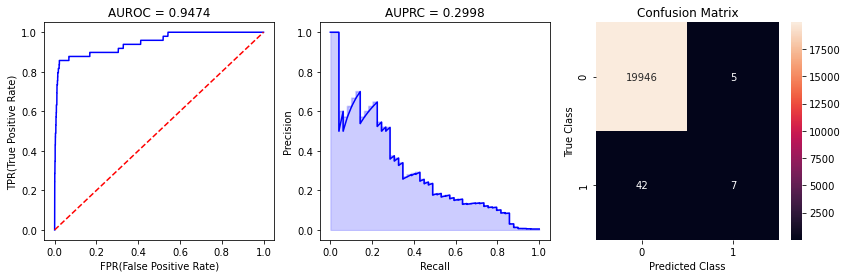

In [30]:
from src.utils import plot_all
y_prob = predictor.predict_proba(test_data_nolab)
y_prob_ = y_prob.iloc[:,-1]
plot_all(y_test, y_prob_)

In [31]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.998156       7.169201  1477.007518                0.248664          63.111221            2       True         14
1            XGBoost_BAG_L1   0.998050       0.277478     8.657345                0.277478           8.657345            1       True         10
2     NeuralNetMXNet_BAG_L1   0.997994       2.946073  1353.303881                2.946073        1353.303881            1       True         11
3   RandomForestGini_BAG_L1   0.997906       1.779989    20.105072                1.779989          20.105072            1       True          1
4   RandomForestEntr_BAG_L1   0.997894       1.778089    18.126080                1.778089          18.126080            1       True          2
5      LightGBMLarge_BAG_L1   0.997789       0.022588     2.842473  

In [32]:
predictor.leaderboard(silent=True)


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.998156,7.169201,1477.007518,0.248664,63.111221,2,True,14
1,XGBoost_BAG_L1,0.998050,0.277478,8.657345,0.277478,8.657345,1,True,10
2,NeuralNetMXNet_BAG_L1,0.997994,2.946073,1353.303881,2.946073,1353.303881,1,True,11
3,RandomForestGini_BAG_L1,0.997906,1.779989,20.105072,1.779989,20.105072,1,True,1
4,RandomForestEntr_BAG_L1,0.997894,1.778089,18.126080,1.778089,18.126080,1,True,2
5,LightGBMLarge_BAG_L1,0.997789,0.022588,2.842473,0.022588,2.842473,1,True,13
6,LightGBMXT_BAG_L1,0.997733,0.021341,1.903894,0.021341,1.903894,1,True,8
7,NeuralNetFastAI_BAG_L1,0.997717,55.287641,2024.712651,55.287641,2024.712651,1,True,12
8,CatBoost_BAG_L1,0.997672,0.067540,5.430621,0.067540,5.430621,1,True,9
9,KNeighborsUnif_BAG_L1,0.997672,4.206636,5.965236,4.206636,5.965236,1,True,5
